<a href="https://colab.research.google.com/github/piyalchakrs/PyTorch-Deep-Learning-/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#pytorch workflow
import torch
from torch import nn #nn contains all of pytorch's building blocks
import matplotlib.pyplot as plt
#pytorch version
torch.__version__

'2.5.1+cu124'

## 1.Data(preparing and loading)

In [81]:
# creating known parameters

weight= 0.7
bias= .3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [82]:
len(X), len(y)

(50, 50)

## 2.Splitting data into test and train sets

In [83]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

VISUALIZING DATA

In [84]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    # Indent the code block within the function
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")
    # predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    # show the legend
    plt.legend(prop={"size": 14})

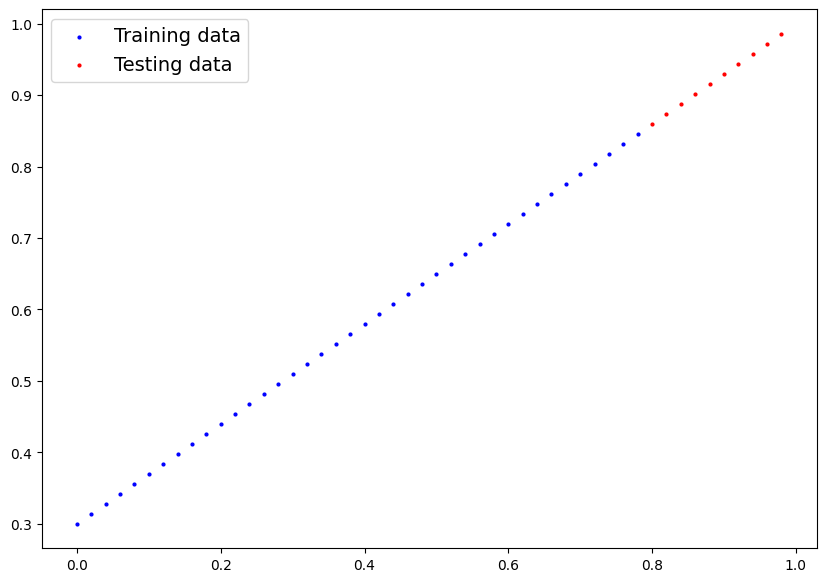

In [85]:
plot_predictions()

## 3.Building a model
what our model does:
1. start with random values(weight & bias)
2. Look at the data and adjust the random values to bettr represent(or get closer to) the ideal values

with two main algorithms:
1. Gradient descent
2. Back propagation

In [86]:
from torch import nn
# linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
       return self.weights * x + self.bias


### checking the contents of the pytorch model

In [87]:
# create a random seed
torch.manual_seed(42)
# create an instance of the model
model_0 = LinearRegressionModel()
# check out the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [88]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [89]:
weight,bias

(0.7, 0.3)

### Making prediction using torch.inference_mode()

In [90]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [91]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

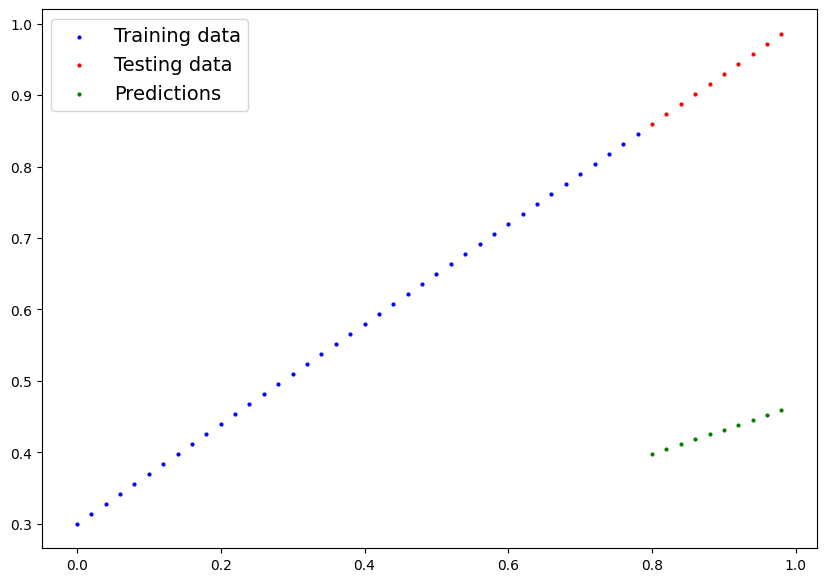

In [92]:
plot_predictions(predictions=y_preds)

## 4.Train a model
things needed:
1.List function
2.Optimizer

In [93]:
# set up a loss function
loss_fn = nn.L1Loss()
# set up an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop(& a testing loop) in pytorch
 things needed:
 1. loop through the data
 2. Forward pass
 3. calculate the loss
 4. optimizer zero grad
 5. loss backward
 6. optimizer step

In [94]:
# An epoch is one loop through data..
epochs = 200

# Track different values
epoch_count = []
loss_value = []
test_loss_values = []

# loop through the data:
for epoch in range(epochs):
  ## training loop
  model_0.train()
  # forward pass
  y_pred = model_0(X_train)
  # calculate the loss
  Loss = loss_fn(y_pred,y_train)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward
  Loss.backward()
  # optimizer step
  optimizer.step()

  ## testing loop
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0 :
    epoch_count.append(epoch)
    loss_value.append(Loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {Loss} | Test Loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [95]:
import numpy as np
np.array(torch.tensor(loss_value).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

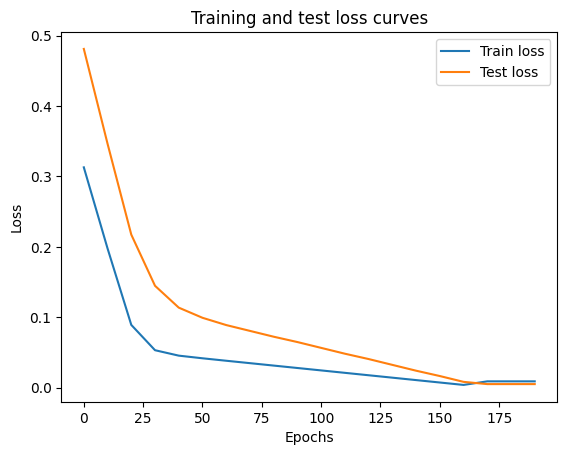

In [96]:
#plot the loss ccurve
plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [97]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [98]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [99]:
weight, bias

(0.7, 0.3)

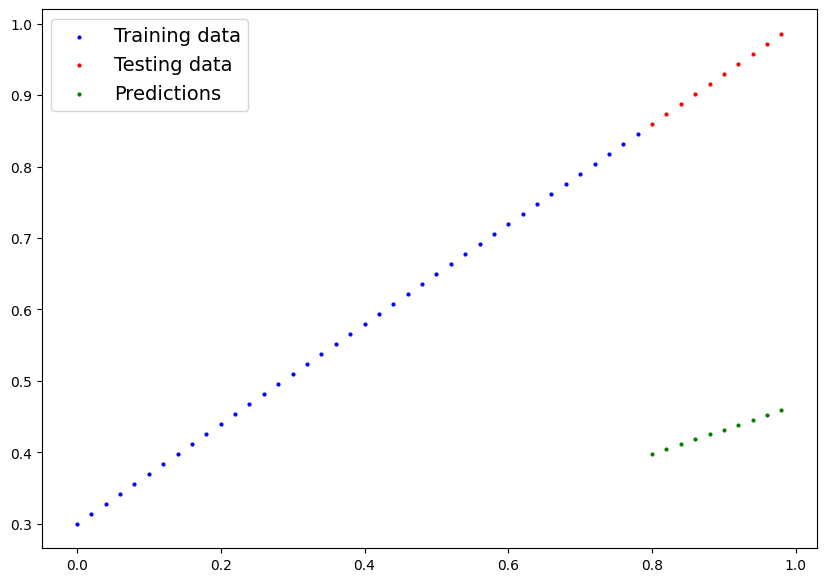

In [100]:
plot_predictions(predictions=y_preds)

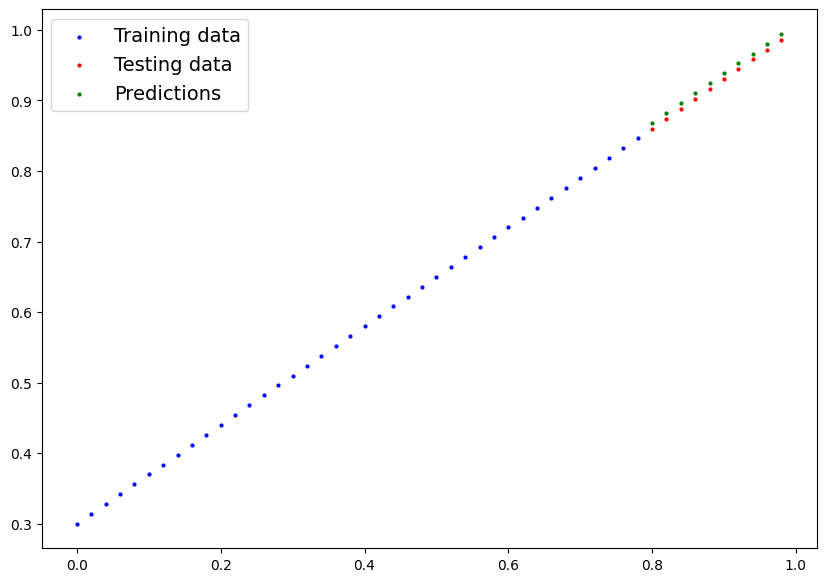

In [101]:
plot_predictions(predictions=y_preds_new)

## 5.Saving a model in pytorch

3 main methods:
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [102]:
# saving our pyTorch model
from pathlib import Path

# 1. create model directory
Model_path = Path("Models")
Model_path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
Model_name = "01_pytorch_workflow_model_0.pth"
Model_save_path = Model_path / Model_name

# 3. save the model state dict
print(f"Saving model to: {Model_save_path}")
torch.save(obj=model_0.state_dict(),
           f=Model_save_path)

Saving model to: Models/01_pytorch_workflow_model_0.pth


In [103]:
!ls -1 Models

01_pytorch_workflow_model_0.pth


## 6.Loading a pytorch model

In [104]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [107]:
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict() of model_0
loaded_model_0.load_state_dict(torch.load(f=Model_save_path))

<ipython-input-107-42531402c125>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=Model_save_path))


<All keys matched successfully>

In [108]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [110]:
# Make some predictions with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [112]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [113]:
# compare loaded with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])